In [1]:
import pandas as pd
import datetime
import time
import numpy as np

In [2]:
s_ec = ['aif_ru_all_comments_mood.csv', 'expert_ru_all_comments_mood.csv', 'izvestia_all_comments_mood.csv', 'kommersant_all_comments_mood.csv', 'mk_ru_all_comments_mood.csv', 'rbc_all_comments_mood.csv', 'ria_all_comments_mood.csv', 'tassagency_all_comments_mood.csv', 'vedomosti_all_comments_mood.csv', 'vesti_all_comments_mood.csv']

In [3]:
s_cb = ['aif_ru_comments_mood_with_cb.csv', 'expert_ru_comments_mood_with_cb.csv', 'izvestia_comments_mood_with_cb.csv', 'kommersant_comments_mood_with_cb.csv', 'mk_ru_comments_mood_with_cb.csv', 'rbc_comments_mood_with_cb.csv', 'ria_comments_mood_with_cb.csv', 'tassagency_comments_mood_with_cb.csv', 'vedomosti_comments_mood_with_cb.csv', 'vesti_comments_mood_with_cb.csv']

In [4]:
df_ec=pd.concat([pd.read_csv(i) for i in s_ec], axis=0)
df_ec = df_ec.sort_values(by=['comment_time'])
df_ec['year'] = df_ec['comment_time']//31536000+1970

In [8]:
df_ec.shape

(143570, 8)

Проверка:

In [12]:
28094+6228+16884+17210+13505+8238+8365+12839+13942+18265

143570

In [14]:
df_cb=pd.concat([pd.read_csv(i) for i in s_cb], axis=0)
df_cb = df_cb.sort_values(by=['comment_time'])
df_cb['year'] = df_cb['comment_time']//31536000+1970
df_cb.shape

(60269, 8)

In [32]:
def get_bootstrap_ci(data_ec, data_cb, N: int = 10**3, alpha: float = 0.1) -> tuple[float, float]:
    n_ec = data_ec.size
    n_cb = data_cb.size
    bootstrap_data_ec = np.random.choice(data_ec['mood'], (N, n_ec), replace=True)
    bootstrap_data_cb = np.random.choice(data_cb['mood'], (N, n_cb), replace=True)
    theta_hat = (bootstrap_data_cb.mean(axis=1)-bootstrap_data_ec.mean(axis=1))/4+np.ones(N)*0.5
    theta_left = np.quantile(theta_hat, alpha/2)
    theta_right = np.quantile(theta_hat, 1-alpha/2)
    return theta_left, theta_right

In [34]:
theta_left_list=list()
theta_right_list=list()
for i in range (2014, 2025):
    data_ec = df_ec[df_ec['year']==i]
    data_cb = df_cb[df_cb['year']==i]
    theta_left, theta_right = get_bootstrap_ci(data_ec, data_cb, N = 1000, alpha = 0.1)
    theta_left_list.append(theta_left)
    theta_right_list.append(theta_right)
theta=pd.DataFrame()
theta['left']=theta_left_list
theta['right']=theta_right_list

In [35]:
theta

,left,right
0,0.497772,0.499519
1,0.499364,0.500883
2,0.500699,0.501940
3,0.500575,0.502278
4,0.500474,0.502200
5,0.499968,0.501990
6,0.500559,0.502397
7,0.499698,0.501356
8,0.499191,0.499993
9,0.497973,0.498620


Matplotlib is building the font cache; this may take a moment.


<Axes: >

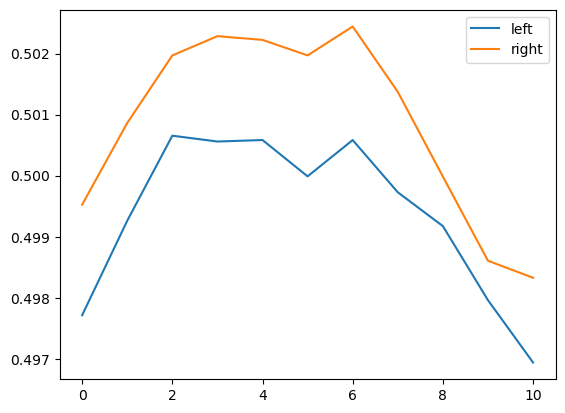

In [30]:
theta.plot()